In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import h5py as h5
%matplotlib inline

(209, 64, 64, 3)
(209,)
(50, 64, 64, 3)
(50,)
THE ABOVE IMAGE IS  0   :non-cat


Text(0.5, 1.0, 'SAMPLE IMAGE')

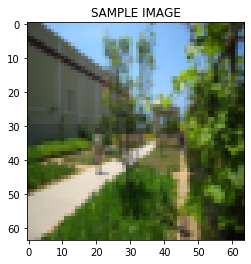

In [2]:
import datasets #stored in the same directory
#TRAINING SET
train_orig=h5.File("datasets/train_catvnoncat.h5", "r")
#print(np.array(train_orig))
train_set_x=np.array(train_orig["train_set_x"])
train_set_y=np.array(train_orig["train_set_y"])
classes=np.array(train_orig["list_classes"])
#print(classes[0].decode("utf-8"))
#classes=print(np.array(train_orig["list_classes"]))

#TEST SET
test_orig=h5.File("datasets/test_catvnoncat.h5", "r")
test_set_x=np.array(test_orig["test_set_x"])
test_set_y=np.array(test_orig["test_set_y"])
print(train_set_x.shape)
print(train_set_y.shape)
print(test_set_x.shape)
print(test_set_y.shape)
image=plt.imshow(train_set_x[8])
print("THE ABOVE IMAGE IS  " + str(train_set_y[8])+"   :"+classes[int(train_set_y[8])].decode("utf-8"))
plt.title("SAMPLE IMAGE")

#(209,)shows that it is an 1D array

In [3]:
#NORMALIZING
train_x=train_set_x/255.0
test_x=test_set_x/255.0
#RESHAPING
print("no of training examples = "+ str(train_x.shape[0]))
train_x=train_x.reshape(209,-1).T
print(train_x.shape)
train_y=train_set_y.reshape(1,train_x.shape[1])
print(train_y.shape)
print("no of test examples = "+ str(test_x.shape[0]))
test_x=test_x.reshape(test_x.shape[0],-1).T
print(test_x.shape)
test_y=test_set_y.reshape(1,test_x.shape[1])
print(test_y.shape)
#1-D array cannot be transposed???????

no of training examples = 209
(12288, 209)
(1, 209)
no of test examples = 50
(12288, 50)
(1, 50)


In [109]:
def param_int(dim):
        W=np.zeros((1,dim))
        b=0
        return W, b


In [110]:
def sigmoid(z):
    a=np.exp(z)/(np.exp(z)+1)
    return a

In [111]:
def forward(X,Y,W,b):
    Z=(np.dot(W,X))+b #1,209
    A=sigmoid(Z)#1,209
    m=X.shape[1]#209
    cost=((-1/m)*((np.sum(np.multiply((np.log(A)),Y)))+np.sum(np.multiply((np.log(1-A)),(1-Y)))))#y=209,1
    dZ=np.subtract(A,Y)#1,209
    dW=(1/m)*np.dot(dZ,X.T)
    #print(dw.shape)
    db=float((1/m)*(np.sum(dZ,axis=1)))
    #print(db)
    return A,dW,db,cost


In [112]:
def back_prob(dW,W,db,b,alpha):
    W=W-(alpha*dW)
    b=b-(alpha*db)
    return W,b

In [117]:
def optimize(X,Y,W_in,b_in,learning_rate,iter):
    costs=[]
    for i in range(iter):
        _,dW,db,cost=forward(X,Y,W_in,b_in)
        if i%100==0:
            costs.append(cost)
        W_in,b_in=back_prob(dW,W_in,db,b_in,learning_rate)
    return W_in,b_in,costs
    

In [121]:
def predict(X,Y,W,b):
    pred=[]
    A =sigmoid((np.dot(W,X))+b)
    for i in A[0]:
        if i<=0.5:
            pred.append(0)
        elif i>0.5:
            pred.append(1)
    accuracy=(100 - np.mean(np.abs(pred - Y)) * 100)
    return pred,accuracy
    

In [129]:
def model(train_x,train_y,test_x,test_y,iter,learning_rate):
    W_in, b_in =param_int(train_x.shape[0])
    W,b,costs=optimize(train_x,train_y,W_in, b_in, learning_rate,iter)
    plots=plt.plot(costs )
    plt.ylabel("cost")
    train_pred,train_acc=predict(train_x,train_y,W,b)
    print("TRAINING ACCURACY = "+ str(train_acc))
    test_pred,test_acc=predict(test_x,test_y,W,b)
    print("TEST ACC ="+ str(test_acc))
    return costs,train_pred,test_pred


TRAINING ACCURACY = 99.04306220095694
TEST ACC =70.0


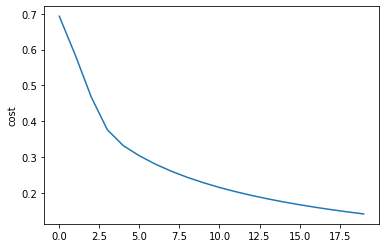

In [131]:
train_pred,test_pred,cost=model(train_x,train_y,test_x,test_y,2000,0.005)

In [124]:
def img_disp(imgset,labelset):
    w=10
    h=10
    fig=plt.figure(figsize=(6, 6))
    columns = 6
    rows = 6
    for i in range(1, columns*rows +1):
        img = imgset[i]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.title(str(labelset[i]))
    plt.show()

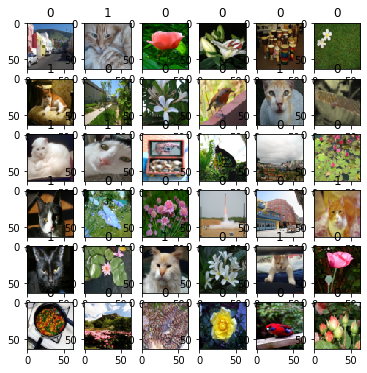

In [125]:
img_disp(train_set_x,train_pred)

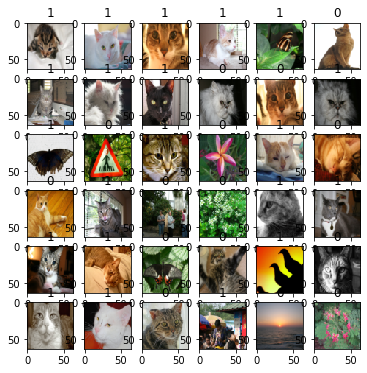

In [126]:
img_disp(test_set_x,test_pred)

TRAINING ACCURACY = 99.52153110047847
TEST ACC =70.0


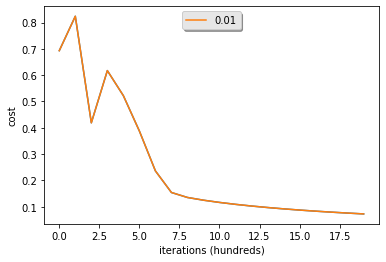

TRAINING ACCURACY = 91.38755980861244
TEST ACC =68.0


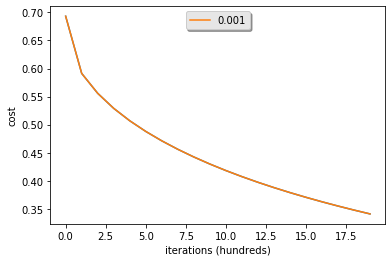

TRAINING ACCURACY = 71.29186602870814
TEST ACC =40.0


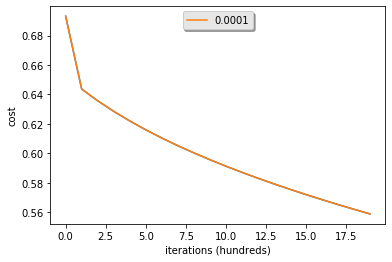

TRAINING ACCURACY = 65.55023923444976
TEST ACC =34.0


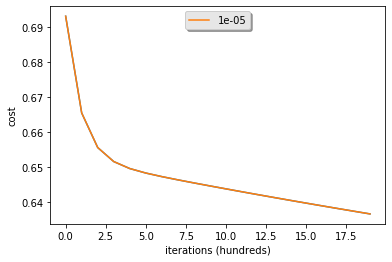

TRAINING ACCURACY = 65.55023923444976
TEST ACC =34.0


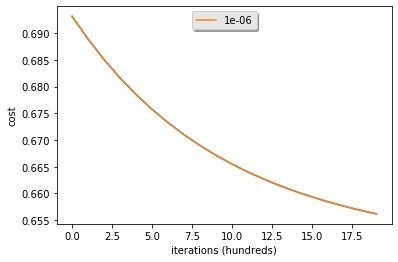

TRAINING ACCURACY = 65.55023923444976
TEST ACC =34.0


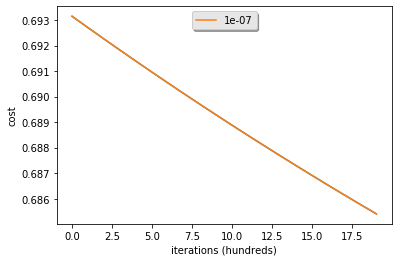

In [132]:
#choosing a better learning rate
alpha=[0.01,0.001,0.0001,0.00001,0.000001,0.0000001]
for i in alpha:
    costs,_,_=model(train_x,train_y,test_x,test_y,2000,i)
    plots=plt.plot(costs , label= str(i))
    plt.ylabel('cost')
    plt.xlabel('iterations (hundreds)')
    legend = plt.legend(loc='upper center', shadow=True)
    frame = legend.get_frame()
    frame.set_facecolor('0.90')
    plt.show()